# Load libary

In [53]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor,StackingRegressor,BaggingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.compose import TransformedTargetRegressor

from sklearn.inspection import permutation_importance
from sklearn.inspection import plot_partial_dependence

from sklearn.preprocessing import PolynomialFeatures

from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from scipy.optimize import curve_fit
# import keras
# import tensorflow

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras import regularizers
# from keras.callbacks import EarlyStopping

from mypipes import *

import warnings
warnings.filterwarnings('ignore') # ignore the warnings.

import seaborn as sb
import matplotlib.pyplot as plt
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")



# Load the data frame

In [54]:
train_file = r'counterfeit_train.csv'
ld_train = pd.read_csv(train_file)
test_file = r'counterfeit_test.csv'
ld_test = pd.read_csv(test_file)

In [55]:
# overview of data
ld_train.head(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
5,JDG81,8.775,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464
6,KPX48,18.000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938
7,CYW14,7.680,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340
8,TVF57,18.550,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292
9,MGU75,9.510,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840


In [56]:
# get to know data type
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [57]:
ld_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

# Data Preproccessing 

In [58]:
for i in range(5):
    temp = ld_train.dropna(axis = 0,)
    temp = temp[['Medicine_ID','Counterfeit_Weight']]
    temp.reset_index(inplace= True)
    ld_train.fillna(temp,inplace= True,axis =0 )

In [59]:
ld_train.isnull().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
dtype: int64

In [60]:
for i in range(5):
    temp = ld_test[['Medicine_ID','Counterfeit_Weight']].dropna()
    temp.reset_index(inplace= True)
    ld_test.fillna(temp,inplace= True)

In [61]:
ld_test.isnull().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
dtype: int64

In [62]:
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [63]:
ld_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1705 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB


In [65]:
# ld_train.to_csv('ld_train_.csv',index=False)
# ld_test.to_csv('ld_test_.csv',index=False)

In [66]:
ld_train.head(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,9.025,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,18.000,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
5,JDG81,8.775,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464
6,KPX48,18.000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938
7,CYW14,7.680,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340
8,TVF57,18.550,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292
9,MGU75,9.510,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840


In [67]:
ld_test.head(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,13.45,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,17.15,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
5,LIC37,14.45,Area010,1996,190.2976,OralContraceptives,mild,0.074382,MidTownResidential,Tier 3,Unknown
6,EXZ14,10.90,Area027,1983,163.3656,OralContraceptives,critical,0.073134,CityLimits,Tier 3,Medium
7,UCB79,17.15,Area046,1995,226.9166,Antacids,mild,0.082101,DownTown,Tier 1,Small
8,IDJ12,18.90,Area027,1983,225.0534,OralContraceptives,mild,0.094614,CityLimits,Tier 3,Medium
9,KLQ71,15.10,Area045,2000,101.0172,Cardiac,critical,0.027763,DownTown,Tier 2,Unknown


In [138]:
pipe1 = pdPipeline([
    ('columns_selection',VarSelector(['DistArea_ID','Active_Since','Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level',])),
    ('data_impute',DataFrameImputer()),
    ('get_dummy',get_dummies_Pipe())
    
])
pipe2 = pdPipeline([
    ('',VarSelector(['Counterfeit_Weight','Medicine_MRP']))#,'Availability_rating'
])

In [139]:
union_pipe = FeatureUnion([
    ('create dummy',pipe1),
    ('select columns',pipe2)    
])


In [140]:
union_pipe.fit(ld_train)

FeatureUnion(transformer_list=[('create dummy',
                                pdPipeline(steps=[('columns_selection',
                                                   VarSelector(feature_names=['DistArea_ID',
                                                                              'Active_Since',
                                                                              'Medicine_Type',
                                                                              'SidEffect_Level',
                                                                              'Area_Type',
                                                                              'Area_City_Type',
                                                                              'Area_dist_level'])),
                                                  ('data_impute',
                                                   DataFrameImputer()),
                                                  ('get_dummy',
            

In [141]:
x_ld_train = pd.DataFrame(data = union_pipe.fit_transform(ld_train) , columns = union_pipe.get_feature_names())
x_ld_train

,create dummy__DistArea_ID_Area017,create dummy__DistArea_ID_Area046,create dummy__DistArea_ID_Area013,create dummy__DistArea_ID_Area035,create dummy__DistArea_ID_Area049,create dummy__DistArea_ID_Area045,create dummy__DistArea_ID_Area027,create dummy__DistArea_ID_Area018,create dummy__DistArea_ID_Area010,create dummy__Active_Since_1983,...,create dummy__Area_Type_DownTown,create dummy__Area_Type_MidTownResidential,create dummy__Area_Type_CityLimits,create dummy__Area_City_Type_Tier 3,create dummy__Area_City_Type_Tier 2,create dummy__Area_dist_level_Medium,create dummy__Area_dist_level_Unknown,create dummy__Area_dist_level_Small,select columns__Counterfeit_Weight,select columns__Medicine_MRP
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.100,160.2366
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,9.025,110.4384
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.025,259.4092
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.800,99.9830
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.000,56.4402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.535,204.1452
6814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.650,235.1088
6815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20.000,193.6292
6816,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.180,162.8682


In [142]:
x_ld_test = pd.DataFrame(data = union_pipe.transform(ld_test) , columns = union_pipe.get_feature_names())
x_ld_test

,create dummy__DistArea_ID_Area017,create dummy__DistArea_ID_Area046,create dummy__DistArea_ID_Area013,create dummy__DistArea_ID_Area035,create dummy__DistArea_ID_Area049,create dummy__DistArea_ID_Area045,create dummy__DistArea_ID_Area027,create dummy__DistArea_ID_Area018,create dummy__DistArea_ID_Area010,create dummy__Active_Since_1983,...,create dummy__Area_Type_DownTown,create dummy__Area_Type_MidTownResidential,create dummy__Area_Type_CityLimits,create dummy__Area_City_Type_Tier 3,create dummy__Area_City_Type_Tier 2,create dummy__Area_dist_level_Medium,create dummy__Area_dist_level_Unknown,create dummy__Area_dist_level_Small,select columns__Counterfeit_Weight,select columns__Medicine_MRP
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,13.45,85.5328
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.45,257.1460
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.10,98.1172
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,18.30,135.3730
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17.15,112.8016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,21.30,136.5704
1701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.30,57.0744
1702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20.40,182.7422
1703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.00,266.9672


In [143]:
x_ld_train.info() # every data is in numaric form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   create dummy__DistArea_ID_Area017               6818 non-null   float64
 1   create dummy__DistArea_ID_Area046               6818 non-null   float64
 2   create dummy__DistArea_ID_Area013               6818 non-null   float64
 3   create dummy__DistArea_ID_Area035               6818 non-null   float64
 4   create dummy__DistArea_ID_Area049               6818 non-null   float64
 5   create dummy__DistArea_ID_Area045               6818 non-null   float64
 6   create dummy__DistArea_ID_Area027               6818 non-null   float64
 7   create dummy__DistArea_ID_Area018               6818 non-null   float64
 8   create dummy__DistArea_ID_Area010               6818 non-null   float64
 9   create dummy__Active_Since_1983          

In [144]:
x_ld_test.info() # every data is in numaric form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   create dummy__DistArea_ID_Area017               1705 non-null   float64
 1   create dummy__DistArea_ID_Area046               1705 non-null   float64
 2   create dummy__DistArea_ID_Area013               1705 non-null   float64
 3   create dummy__DistArea_ID_Area035               1705 non-null   float64
 4   create dummy__DistArea_ID_Area049               1705 non-null   float64
 5   create dummy__DistArea_ID_Area045               1705 non-null   float64
 6   create dummy__DistArea_ID_Area027               1705 non-null   float64
 7   create dummy__DistArea_ID_Area018               1705 non-null   float64
 8   create dummy__DistArea_ID_Area010               1705 non-null   float64
 9   create dummy__Active_Since_1983          

In [145]:
y_ld_train = pd.DataFrame(data = np.array(ld_train.Counterfeit_Sales) , columns = ['Actual Counterfeit_Sales'])

In [146]:
y_ld_train.isnull().sum()

Actual Counterfeit_Sales    0
dtype: int64

<AxesSubplot:>

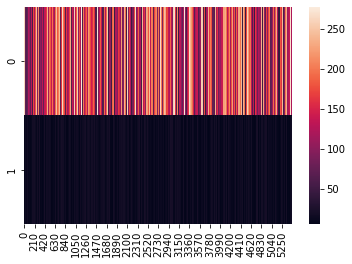

In [162]:
import seaborn as sns
sns.heatmap([X_train['select columns__Medicine_MRP'],X_train['select columns__Counterfeit_Weight']])




# Data Splite for Train and test

In [147]:
X_train,X_test,Y_train,Y_test = train_test_split(x_ld_train, y_ld_train, test_size=0.2,random_state= 32)

In [148]:
Y_test =  pd.DataFrame(data = np.array(Y_test) , columns = ['Actual Counterfeit_Sales'])
Y_test

,Actual Counterfeit_Sales
0,3683.6854
1,3069.1520
2,933.2656
3,7141.1848
4,2975.9400
...,...
1359,1764.1840
1360,2294.1608
1361,7271.6816
1362,2256.8760


# Linear Regression


In [79]:
Lm_1 = LinearRegression()
Lm_1.fit(X_train,Y_train) 

LinearRegression()

In [80]:
Y_predict = Lm_1.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [81]:
mean_absolute_error(Y_test,Y_predict)

796.7256879092049

In [82]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.520044766319756

In [83]:
mean_squared_error(Y_test,Y_predict)

1167630.8331171754

In [84]:
r2_score(Y_test,Y_predict)

0.5912444355218059

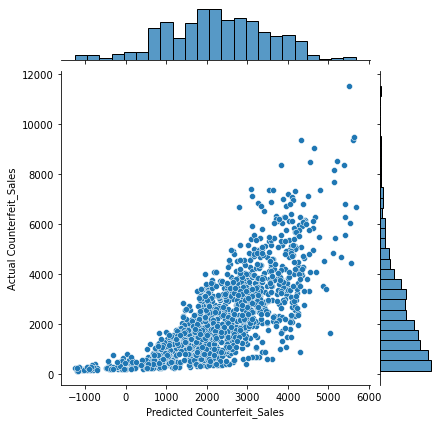

In [85]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), y = 'Actual Counterfeit_Sales' , x ='Predicted Counterfeit_Sales')

# Lasso

In [195]:
alpha = np.linspace(0.01,100,100)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

random_search = RandomizedSearchCV(Lm_2,
                                   param_distributions = param_grid,
                                   n_iter = 25,
                                   cv = 5,
                                   scoring = 'r2' )

In [43]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=25,
                   param_distributions={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2....
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
                   scoring='r2')

In [44]:
random_search.best_estimator_

Lasso(alpha=6.07)

In [45]:
alpha = np.linspace(0,10,100)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

random_search = RandomizedSearchCV(Lm_2,
                                   param_distributions = param_grid,
                                   n_iter = 100,
                                   cv = 5,
                                   scoring = 'r2' )

In [46]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.4242424...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])},
                   scoring=

In [47]:
random_search.best_estimator_

Lasso(alpha=5.656565656565657)

In [48]:
alpha = np.linspace(4,7,50)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

grid_search = GridSearchCV(Lm_2,
                                   param_grid = param_grid,

                                   cv = 5,
                                       scoring = 'neg_mean_absolute_error' )

In [49]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([4.        , 4.06122449, 4.12244898, 4.18367347, 4.24489796,
       4.30612245, 4.36734694, 4.42857143, 4.48979592, 4.55102041,
       4.6122449 , 4.67346939, 4.73469388, 4.79591837, 4.85714286,
       4.91836735, 4.97959184, 5.04081633, 5.10204082, 5.16326531,
       5.2244898 , 5.28571429, 5.34693878, 5.40816327, 5.46938776,
       5.53061224, 5.59183673, 5.65306122, 5.71428571, 5.7755102 ,
       5.83673469, 5.89795918, 5.95918367, 6.02040816, 6.08163265,
       6.14285714, 6.20408163, 6.26530612, 6.32653061, 6.3877551 ,
       6.44897959, 6.51020408, 6.57142857, 6.63265306, 6.69387755,
       6.75510204, 6.81632653, 6.87755102, 6.93877551, 7.        ])},
             scoring='neg_mean_absolute_error')

In [50]:
Lasso_model = grid_search.best_estimator_

In [51]:
Lasso_model.fit(X_train,Y_train)
Y_predict = Lasso_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [52]:
mean_absolute_error(Y_test,Y_predict)

794.7757082733748

In [56]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5212194528473646

In [53]:
mean_squared_error(Y_test,Y_predict)

1169972.849544961

In [54]:
r2_score(Y_test,Y_predict)

0.5904245597358942

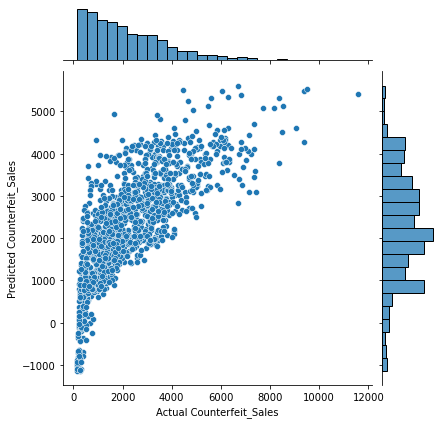

In [55]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# Ridge

In [57]:
alpha = np.linspace(0.001,100,100)
param_grid = {'alpha':alpha}

Lm_3 = Ridge()

grid_search = GridSearchCV(Lm_3,
                                   param_grid = param_grid,
                                   cv = 5,
                                   scoring = 'r2' )


In [58]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1....
       7.67679091e+01, 7.77780000e+01, 7.87880909e+01, 7.97981818e+01,
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             scoring='r2')

In [59]:
grid_search.best_estimator_

Ridge(alpha=26.26336363636364)

In [60]:
Rigge_model = grid_search.best_estimator_
Rigge_model.fit(X_train,Y_train)

Ridge(alpha=26.26336363636364)

In [61]:
Y_predict = Rigge_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [62]:
mean_absolute_error(Y_test,Y_predict)

796.2914199418502

In [63]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5203063735290059

In [64]:
mean_squared_error(Y_test,Y_predict)

1167472.7586247746

In [65]:
r2_score(Y_test,Y_predict)

0.5912997730707454

In [66]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.558858 (std: 0.013088)
Parameters: {'alpha': 5.656565656565657}

Model with rank: 2
Mean validation score: 0.558858 (std: 0.013079)
Parameters: {'alpha': 5.757575757575758}

Model with rank: 3
Mean validation score: 0.558858 (std: 0.013097)
Parameters: {'alpha': 5.555555555555555}

Model with rank: 4
Mean validation score: 0.558857 (std: 0.013107)
Parameters: {'alpha': 5.454545454545454}

Model with rank: 5
Mean validation score: 0.558857 (std: 0.013071)
Parameters: {'alpha': 5.858585858585858}



# AdaBoost Regressor

In [67]:
%%time
ada_model = AdaBoostRegressor()
ada_model_cv_scores = cross_val_score(ada_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
ada_model_cv_scores.mean()

Wall time: 2.16 s


-1777421.0198279452

In [68]:
ada_model.fit(X_train,Y_train)

AdaBoostRegressor()

In [69]:
Y_predict = ada_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [70]:
mean_absolute_error(Y_test,Y_predict)

988.0477555701407

In [71]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.4047905086926863

In [72]:
mean_squared_error(Y_test,Y_predict)

1479019.478069871

In [73]:
r2_score(Y_test,Y_predict)

0.48223580220236884

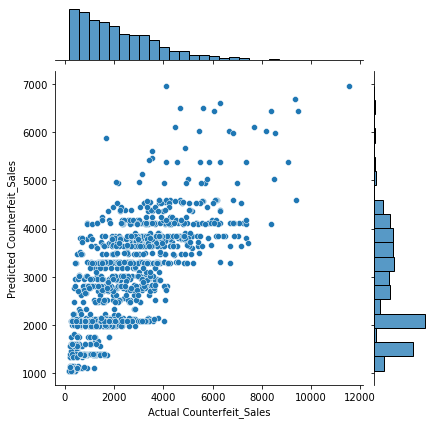

In [74]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# Gradient Boosting Regressor

In [75]:
%%time
Gra_model = GradientBoostingRegressor()
Gra_model_cv_scores = cross_val_score(Gra_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
Gra_model_cv_scores.mean()

Wall time: 1.9 s


-1188158.2181741418

In [76]:
Gra_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [77]:
Y_predict.shape

(1364, 1)

In [78]:
mean_absolute_error(Y_test,Y_predict)

988.0477555701407

In [79]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.4047905086926863

In [80]:
mean_squared_error(Y_test,Y_predict)

1479019.478069871

In [81]:
r2_score(Y_test,Y_predict)

0.48223580220236884

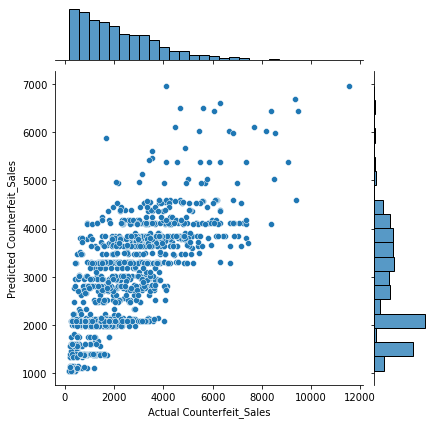

In [82]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# DecisionTree Regressor

In [77]:
dtree_model = DecisionTreeRegressor()
dtree_model_cv_scores = cross_val_score(dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
dtree_model_cv_scores.mean()

-2410613.548575323

In [78]:
dtree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [79]:
Y_predict = dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [80]:
mean_absolute_error(Y_test,Y_predict)

1054.4973592375368

In [81]:
mean_squared_error(Y_test,Y_predict)

2400834.0616688463

In [82]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.3647606269653393

In [83]:
r2_score(Y_test,Y_predict)

0.18876207746423357

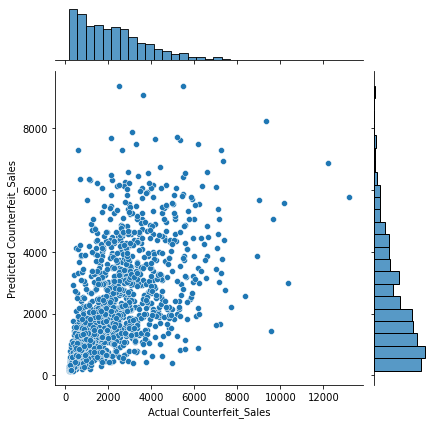

In [84]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

## hyperparameter tuning

In [85]:
%%time
dtree_reg_model = DecisionTreeRegressor()

dtree_clf_params = {
    'splitter':['best', 'random'],
    'criterion':['mse', 'mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20]
}

dtree_reg_random_search = RandomizedSearchCV(dtree_reg_model,param_distributions=dtree_clf_params,
                                             cv = 5, n_iter=10,scoring='neg_mean_squared_error')

dtree_reg_random_search.fit(X_train,Y_train)

Wall time: 27.5 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [86]:
report(dtree_reg_random_search.cv_results_,3)

Model with rank: 1
Mean validation score: -1195347.588055 (std: 41061.719618)
Parameters: {'splitter': 'best', 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'mae'}

Model with rank: 2
Mean validation score: -1295756.442460 (std: 57053.919773)
Parameters: {'splitter': 'random', 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'mse'}

Model with rank: 3
Mean validation score: -1296581.838793 (std: 73048.843279)
Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 30, 'criterion': 'mse'}



In [87]:
dtree_reg = dtree_reg_random_search.best_estimator_

In [88]:
dtree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5,
                      min_samples_split=15)

In [89]:
Y_predict = dtree_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [90]:
mean_absolute_error(Y_test,Y_predict)

732.6574980205279

In [91]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5586400614334169

In [92]:
mean_squared_error(Y_test,Y_predict)

1158431.0554583317

In [93]:
r2_score(Y_test,Y_predict)

0.6085680314874855

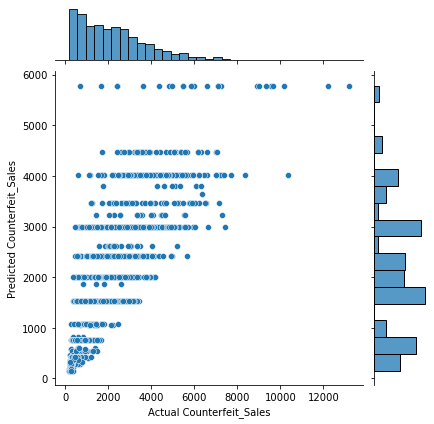

In [94]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# RandomForest Regressor

In [43]:
rf_dtree_model = RandomForestRegressor()
rf_dtree_model_cv_scores = cross_val_score(rf_dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
rf_dtree_model_cv_scores.mean()

-1297244.6713332026

In [44]:
rf_dtree_model.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
Y_predict = rf_dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [46]:
mean_absolute_error(Y_test,Y_predict)

763.7116303284458

In [47]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5399327528141893

In [48]:
mean_squared_error(Y_test,Y_predict)

1187327.6591294964

In [49]:
r2_score(Y_test,Y_predict)

0.5843491163791954

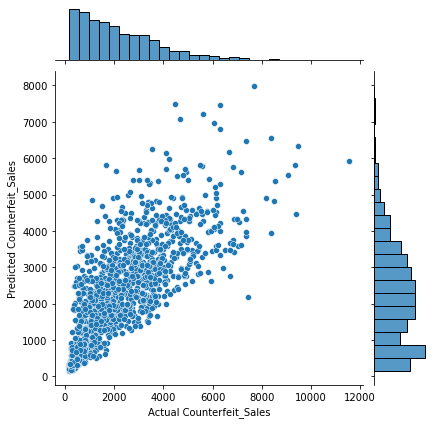

In [50]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [60]:
%%time
rf_reg_model = RandomForestRegressor()

rf_reg_params = {
    'n_estimators':[100,200,300,500,700,1000], #number of individual decision trees to be created
    'max_features': ['auto','sqrt','log2'], #how many features would be available at a split
    'bootstrap': [True, False], #should different data subsets go in or not
    'criterion':['mse', 'mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20]
}

rf_reg_random_search = RandomizedSearchCV(rf_reg_model,param_distributions=rf_reg_params,
                                             cv = 2,
                                    n_iter=50,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1,verbose=1)

rf_reg_random_search.fit(X_train,Y_train)
report(rf_reg_random_search.cv_results_,3)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Model with rank: 1
Mean validation score: -1175342.985427 (std: 16788.949350)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse', 'bootstrap': True}

Model with rank: 2
Mean validation score: -1179097.732310 (std: 21758.455472)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mae', 'bootstrap': True}

Model with rank: 3
Mean validation score: -1179670.028830 (std: 19965.246839)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'mae', 'bootstrap': True}

Wall time: 15min 16s


In [61]:
rf_reg = rf_reg_random_search.best_estimator_

In [62]:
rf_reg.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [63]:
Y_predict = rf_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [64]:
mean_absolute_error(Y_test,Y_predict)

723.517605209206

In [65]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5641460209583097

In [66]:
mean_squared_error(Y_test,Y_predict)

1066730.714327852

In [67]:
r2_score(Y_test,Y_predict)

0.6265668026963184

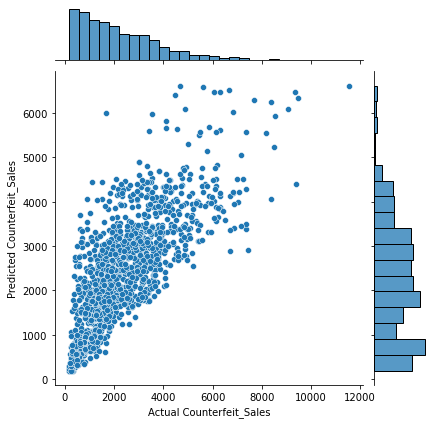

In [68]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# ExtraTrees Regressor

In [25]:
et_dtree_model = ExtraTreesRegressor()
et_dtree_model_cv_scores = cross_val_score(et_dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
et_dtree_model_cv_scores.mean()

-1428077.3041926413

In [26]:
et_dtree_model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [27]:
Y_predict = et_dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])


In [28]:
mean_absolute_error(Y_test,Y_predict)

788.8882666994135

In [29]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5247661043979437

In [30]:
mean_squared_error(Y_test,Y_predict)

1313926.4421366835

In [31]:
r2_score(Y_test,Y_predict)

0.5400303509418305

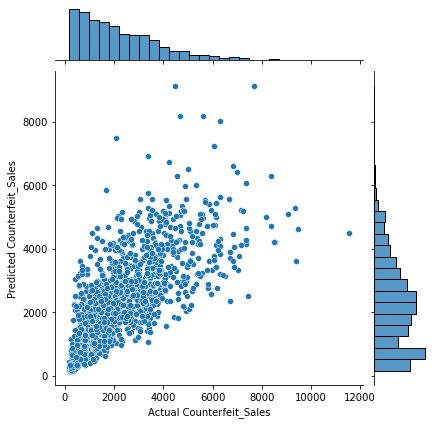

In [32]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [51]:
%%time
etree_reg_model = ExtraTreesRegressor()

etree_reg_params = {
    'n_estimators':[100,200,300,500,700,1000], #number of individual decision trees to be created
    'max_features': ['auto','sqrt','log2'], #how many features would be available at a split
    'bootstrap': [True, False], #should different data subsets go in or not
    'criterion':['mse', 'mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20]
}

etree_reg_random_search = RandomizedSearchCV(etree_reg_model,param_distributions=etree_reg_params,
                                             cv = 2, n_iter=50,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)

etree_reg_random_search.fit(X_train,Y_train)
report(etree_reg_random_search.cv_results_,3)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Model with rank: 1
Mean validation score: -1164118.855430 (std: 34567.747978)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mse', 'bootstrap': False}

Model with rank: 2
Mean validation score: -1166477.660180 (std: 26619.346586)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}

Model with rank: 3
Mean validation score: -1174012.317010 (std: 26977.122523)
Parameters: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mae', 'bootstrap': True}

Wall time: 8min 16s


In [52]:
etree_reg = etree_reg_random_search.best_estimator_

In [53]:
etree_reg.fit(X_train,Y_train)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                    n_estimators=200)

In [54]:
Y_predict = etree_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [55]:
mean_absolute_error(Y_test,Y_predict)

720.9805301529452

In [56]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5656743794259367

In [57]:
mean_squared_error(Y_test,Y_predict)

1059829.2682222566

In [58]:
r2_score(Y_test,Y_predict)

0.6289828098953381

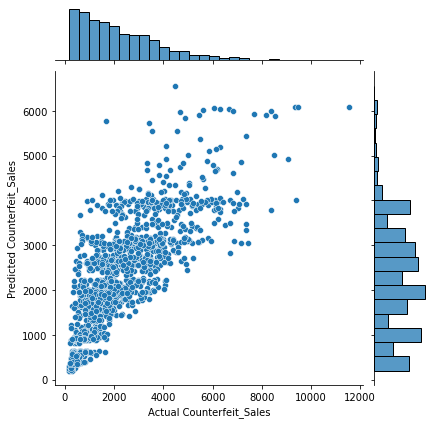

In [59]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# LGBM Regressor

In [ ]:
%%time 'splitter': 'best', 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'mae'
lgm_model = CatBoostRegressor()
para = {
    'n_estimators': list(np.linspace(2,200,200).astype(int))
    
}
    
lgm_model_search = GridSearchCV(lgm_model, param_grid = para, cv = 5, scoring='r2')

lgm_model_search.fit(X_train,Y_train)

lgm_model_search.best_score_



# lgm_model_cv_scores = cross_val_score(lgm_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
# lgm_model_cv_scores.mean()

Learning rate set to 0.5
0:	learn: 1279.4221169	total: 2.31ms	remaining: 2.31ms
1:	learn: 1156.4704589	total: 4.55ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1316.7234078	total: 2.23ms	remaining: 2.23ms
1:	learn: 1166.7063574	total: 4.34ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1309.7843552	total: 2.09ms	remaining: 2.09ms
1:	learn: 1162.8138142	total: 4.55ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1290.2828035	total: 2.28ms	remaining: 2.28ms
1:	learn: 1153.8966295	total: 4.58ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1271.5663110	total: 2.1ms	remaining: 2.1ms
1:	learn: 1140.1448882	total: 4.76ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1279.4221169	total: 2.58ms	remaining: 2.58ms
1:	learn: 1156.4704589	total: 5.04ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1316.7234078	total: 2.61ms	remaining: 2.61ms
1:	learn: 1166.7063574	total: 4.74ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1309.7843552	total: 2.16ms	remaining: 2.16m

In [458]:
%%time 
lgm_model = BaggingRegressor(DecisionTreeRegressor(splitter = 'best',min_samples_split = 15 , min_samples_leaf = 5,max_depth = 5 , criterion = 'mae' ),n_estimators=100)
para = {
    #'n_estimators': list(np.linspace(2,200,200).astype(int))
    
}
    
lgm_model_search = GridSearchCV(lgm_model, param_grid = para, cv = 5, scoring='r2')

lgm_model_search.fit(X_train,Y_train)

lgm_model_search.best_score_



# lgm_model_cv_scores = cross_val_score(lgm_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
# lgm_model_cv_scores.mean()

Wall time: 3min 3s


0.5913139431053823

In [440]:
lgm_model = lgm_model_search.best_estimator_
lgm_model.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mae',
                                                      max_depth=5,
                                                      min_samples_leaf=5,
                                                      min_samples_split=15),
                 n_estimators=50)

In [441]:
Y_predict = lgm_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [442]:
mean_absolute_error(Y_test,Y_predict)

724.3585402008798

In [443]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5636394336139279

In [444]:
mean_squared_error(Y_test,Y_predict)

1133000.5954262365

In [445]:
r2_score(Y_test,Y_predict)

0.6171609425490794

<AxesSubplot:xlabel='Actual Counterfeit_Sales', ylabel='Predicted Counterfeit_Sales'>

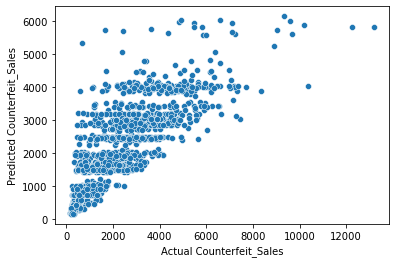

In [448]:
sb.scatterplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [452]:
transformed_data_sub = pd.DataFrame(data = lgm_model.predict(x_ld_test), columns= ['Counterfeit_Sales'])

In [453]:
temp = ld_test['Medicine_ID']

In [454]:
submissions = pd.concat([temp,transformed_data_sub],axis = 1)

In [455]:
submissions

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2076.677230
1,ECE94,4008.163030
2,SAD14,1496.559032
3,EQV63,386.224346
4,AIR10,330.064116
...,...,...
1700,KXW10,3177.897114
1701,CKE54,784.226270
1702,HAY13,2868.166954
1703,ZEE32,3938.633536


In [456]:
submissions.to_csv('sample_submission.csv',index=False)

In [457]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medicine_ID        1705 non-null   object 
 1   Counterfeit_Sales  1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


# CatBoost Regressor

In [383]:
%%time
cat_model = CatBoostRegressor(n_estimators= 140)
cat_model_cv_scores = cross_val_score(cat_model,X_train,Y_train,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
cat_model_cv_scores.mean()

Wall time: 1.42 s


-1111.5941454041554

In [384]:
cat_model.fit(X_train,Y_train)

Learning rate set to 0.264715
0:	learn: 1450.6781242	total: 2.5ms	remaining: 348ms
1:	learn: 1308.2024885	total: 5ms	remaining: 345ms
2:	learn: 1212.1184819	total: 7.36ms	remaining: 336ms
3:	learn: 1151.7842910	total: 9.62ms	remaining: 327ms
4:	learn: 1114.9036501	total: 11.9ms	remaining: 321ms
5:	learn: 1092.9620878	total: 14.3ms	remaining: 319ms
6:	learn: 1079.2770057	total: 17.1ms	remaining: 324ms
7:	learn: 1071.5379691	total: 19.6ms	remaining: 323ms
8:	learn: 1066.0563985	total: 22ms	remaining: 320ms
9:	learn: 1062.6519220	total: 24.4ms	remaining: 317ms
10:	learn: 1058.3591934	total: 26.8ms	remaining: 314ms
11:	learn: 1056.0709346	total: 29ms	remaining: 309ms
12:	learn: 1053.2335072	total: 31.3ms	remaining: 306ms
13:	learn: 1050.8531129	total: 33.8ms	remaining: 305ms
14:	learn: 1049.2721643	total: 36.2ms	remaining: 302ms
15:	learn: 1047.9785416	total: 38.4ms	remaining: 297ms
16:	learn: 1047.2024248	total: 40.4ms	remaining: 292ms
17:	learn: 1045.4225899	total: 42.5ms	remaining: 288m

In [378]:
Y_predict = cat_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [379]:
mean_absolute_error(Y_test,Y_predict)

749.472060141705

In [380]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5485108071435512

In [381]:
mean_squared_error(Y_test,Y_predict)

1212282.2900468775

In [382]:
r2_score(Y_test,Y_predict)

0.5903717869526877

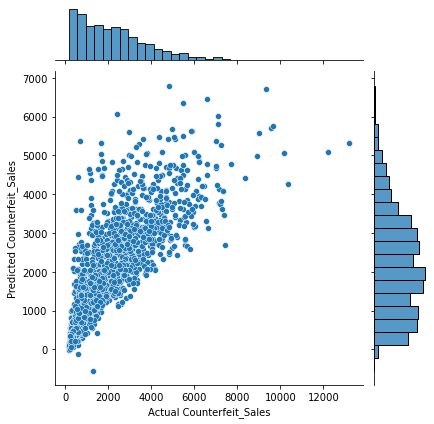

In [369]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# XGB Regressor

In [318]:
%%time
xgb_model = XGBRegressor(n_estimators = 10)
xgb_model_cv_scores = cross_val_score(xgb_model,X_train,Y_train,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
xgb_model_cv_scores.mean()

Wall time: 2.43 s


-1084.7263246268976

In [319]:
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [320]:
Y_predict = xgb_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [321]:
mean_absolute_error(Y_test,Y_predict)

731.3717593200504

In [322]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5594146028192468

In [323]:
mean_squared_error(Y_test,Y_predict)

1154685.4854513998

In [324]:
r2_score(Y_test,Y_predict)

0.6098336534976228

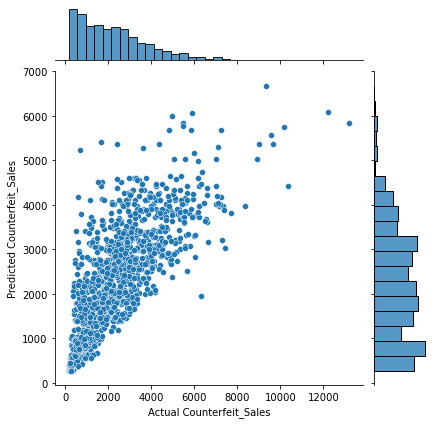

In [325]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# Stacking Regressor

In [82]:
estimators = [
    ('et_dtree_model',et_dtree_model),
    ('dtree_reg_model',dtree_reg_model),
    ('rf_dtree_model',rf_dtree_model),
    ('etree_reg_model',etree_reg_model),
    ('rf_reg_model',rf_reg_model),
]

stack_reg_model = StackingRegressor(estimators=estimators,final_estimator=MLPRegressor(hidden_layer_sizes = (2,2,2,2),activation = 'identity'))#SVR(kernel = 'linear',degree = 1,epsilon = 0.05))

# stack_cv_scores= cross_val_score(stack_reg_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
# stack_cv_scores.mean()

In [83]:
%%time
stack_reg_model.fit(X_train,Y_train)

Wall time: 48.1 s


StackingRegressor(estimators=[('et_dtree_model', ExtraTreesRegressor()),
                              ('dtree_reg_model', DecisionTreeRegressor()),
                              ('rf_dtree_model', RandomForestRegressor()),
                              ('etree_reg_model', ExtraTreesRegressor()),
                              ('rf_reg_model', RandomForestRegressor())],
                  final_estimator=MLPRegressor(activation='identity',
                                               hidden_layer_sizes=(2, 2, 2, 2)))

In [101]:
Y_predict = stack_reg_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape


,Predicted Counterfeit_Sales
0,2718.517199
1,1336.882372
2,2651.362092
3,2399.574332
4,1587.721244
...,...
1359,2504.421287
1360,1105.899462
1361,748.911977
1362,1804.955397


In [102]:
mean_absolute_error(Y_test,Y_predict)

763.4486991761594

In [103]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5400911450746028

In [104]:
mean_squared_error(Y_test,Y_predict)

1261171.411026542

In [105]:
r2_score(Y_test,Y_predict)

0.5584984419761536

<AxesSubplot:xlabel='Actual Counterfeit_Sales', ylabel='Predicted Counterfeit_Sales'>

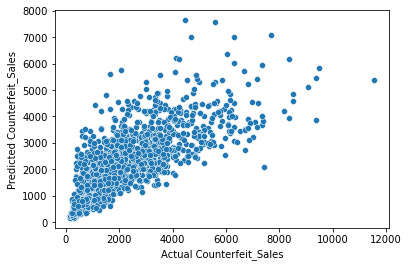

In [108]:
sb.scatterplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# Model Interpretation


In [337]:
etree_reg.feature_importances_

array([2.41335432e-03, 1.97580590e-03, 2.60104776e-03, 2.13220661e-03,
       1.57698207e-03, 2.53303054e-03, 5.41030403e-02, 2.10458950e-03,
       1.46164490e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.81888901e-03, 4.56858917e-03, 3.15282081e-03,
       1.76001202e-03, 2.13725228e-03, 7.37806131e-04, 8.65224536e-04,
       8.20999266e-04, 9.01060988e-04, 4.71146789e-04, 8.95823539e-05,
       9.47252310e-05, 1.22791805e-05, 1.37564853e-04, 6.11640301e-05,
       8.80960543e-03, 2.29779454e-03, 2.77782776e-01, 5.31047002e-02,
       3.94445882e-03, 2.97454268e-03, 2.02244091e-03, 1.90505473e-03,
       2.45053242e-03, 1.19469660e-02, 5.32433114e-01, 1.02442241e-02])

In [121]:
def feature_imp_rank(model,x_data):
    #creating a simple dataframe with column names and importances
    feature_importance_table = pd.DataFrame({
        'Feature': x_data.columns,
        'Importance': model.feature_importances_
    })
    
    #sorting based on importance
    feature_importance_table.sort_values(by='Importance', ascending=False,inplace=True)
    
    #gettnig a relative importance = importance of a variable/overall sum of importances
    feature_importance_table['Importance'] = (feature_importance_table['Importance']/feature_importance_table['Importance'].sum())*100

    print('\nFeature Importance \n')
    print(feature_importance_table)


def prem_feature_imp(model,x_data,y_data):
    perm_importances = permutation_importance(model, x_data,y_data)
    perm_importance_table = pd.DataFrame({
    'Feature': x_data.columns,
    'Importance': perm_importances.importances_mean
    })

    perm_importance_table.sort_values(by='Importance', ascending=False,inplace=True)
    
    perm_importance_table['Importance'] = (perm_importance_table['Importance']/perm_importance_table['Importance'].sum())*100

    print('\nPremutation Feature Importance \n')
    print(perm_importance_table)

In [136]:
X_train

,create dummy__DistArea_ID_Area017,create dummy__DistArea_ID_Area046,create dummy__DistArea_ID_Area013,create dummy__DistArea_ID_Area035,create dummy__DistArea_ID_Area049,create dummy__DistArea_ID_Area045,create dummy__DistArea_ID_Area027,create dummy__DistArea_ID_Area018,create dummy__DistArea_ID_Area010,create dummy__Active_Since_1983,...,create dummy__Medicine_Type_Stimulants,create dummy__SidEffect_Level_mild,create dummy__Area_Type_DownTown,create dummy__Area_Type_MidTownResidential,create dummy__Area_Type_CityLimits,create dummy__Area_City_Type_Tier 3,create dummy__Area_City_Type_Tier 2,create dummy__Area_dist_level_Medium,create dummy__Area_dist_level_Unknown,create dummy__Area_dist_level_Small
1238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
760,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [137]:
#feature_imp_rank(etree_reg,X_train)
prem_feature_imp(cat_model,X_train,Y_train)


Premutation Feature Importance 

                                           Feature  Importance
34      create dummy__Area_Type_MidTownResidential   47.779598
35              create dummy__Area_Type_CityLimits   10.463734
32              create dummy__SidEffect_Level_mild    8.749629
6                create dummy__DistArea_ID_Area027    4.541349
31          create dummy__Medicine_Type_Stimulants    3.561561
40             create dummy__Area_dist_level_Small    2.858802
17       create dummy__Medicine_Type_Hreplacements    2.476137
33                create dummy__Area_Type_DownTown    1.915291
25          create dummy__Medicine_Type_Analgesics    1.870510
23         create dummy__Medicine_Type_Mstablizers    1.671350
18         create dummy__Medicine_Type_Antibiotics    1.191137
26        create dummy__Medicine_Type_Antimalarial    1.078671
22             create dummy__Medicine_Type_Cardiac    1.040364
30          create dummy__Medicine_Type_Antifungal    1.008040
0                crea

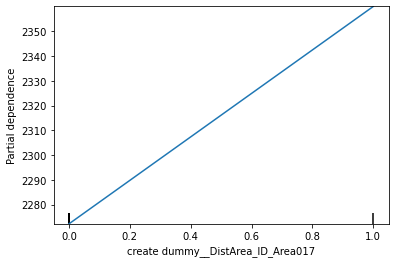

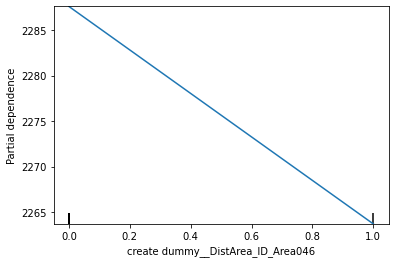

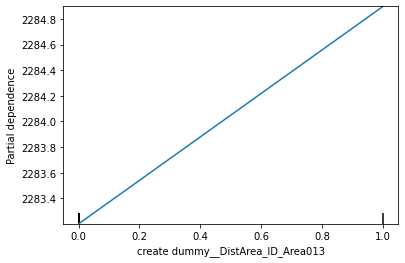

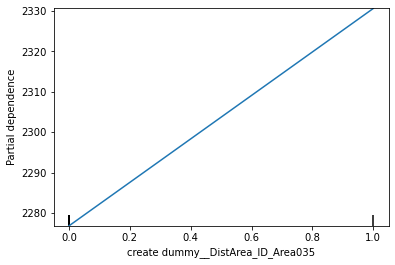

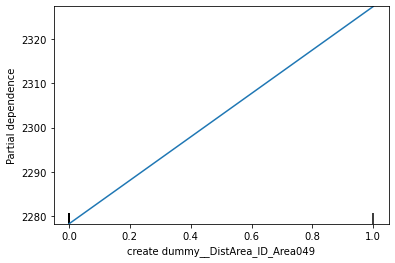

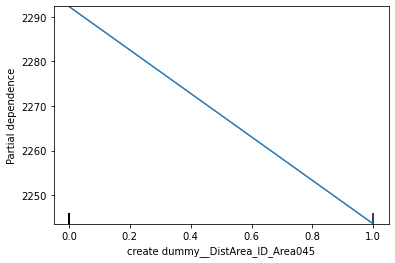

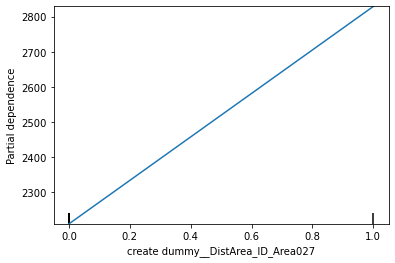

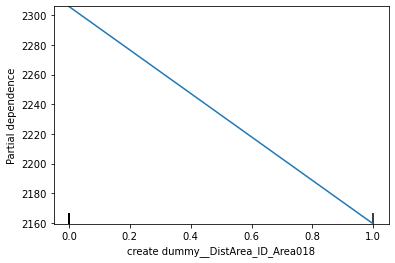

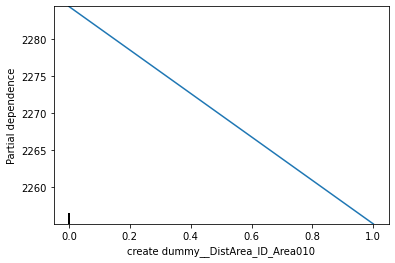

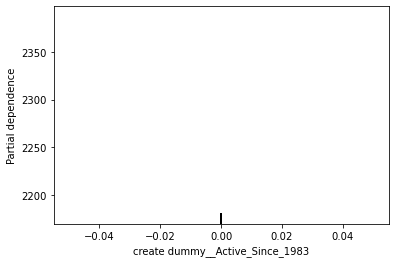

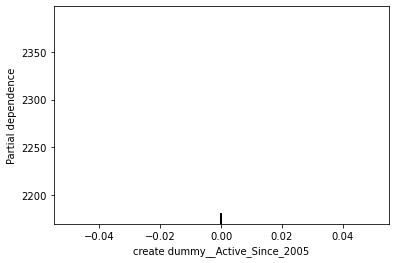

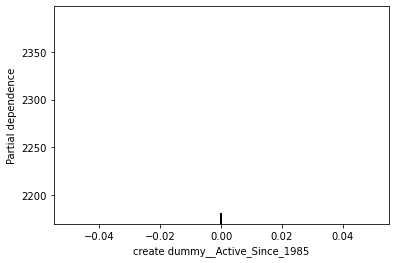

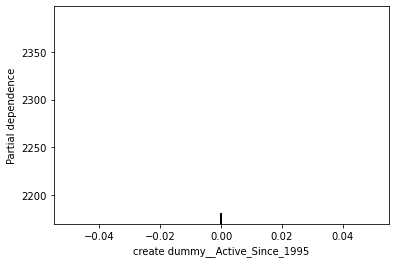

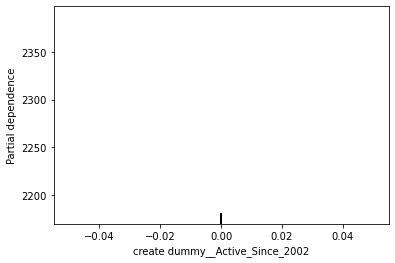

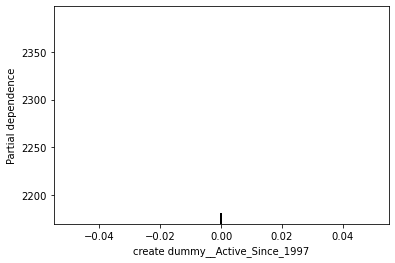

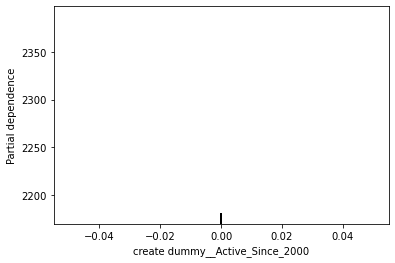

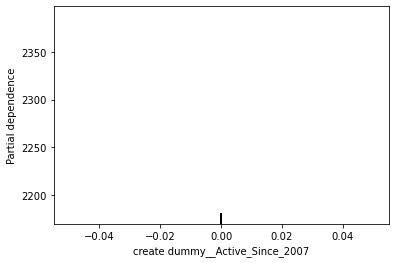

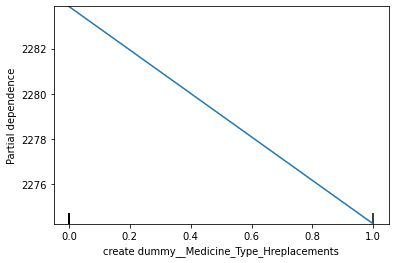

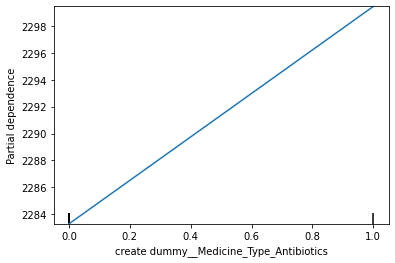

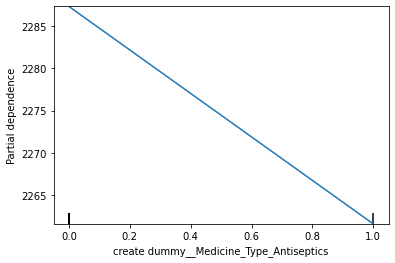

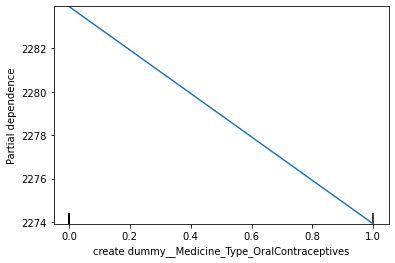

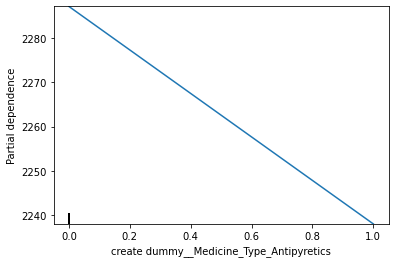

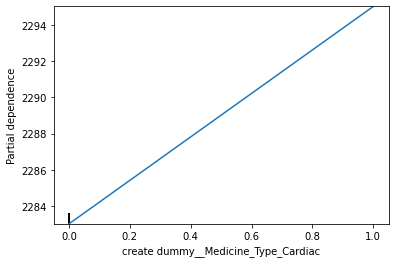

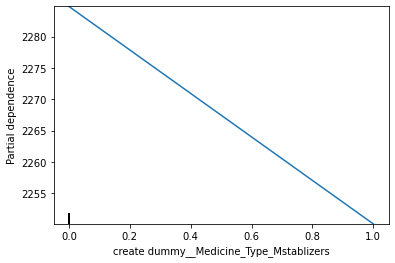

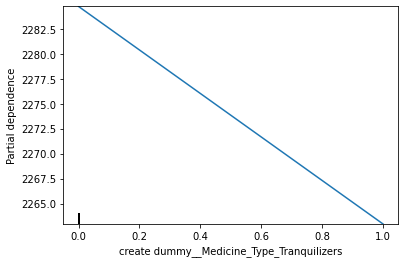

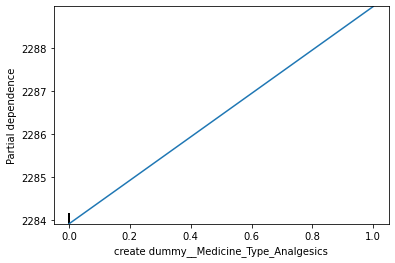

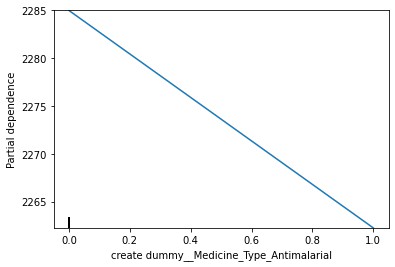

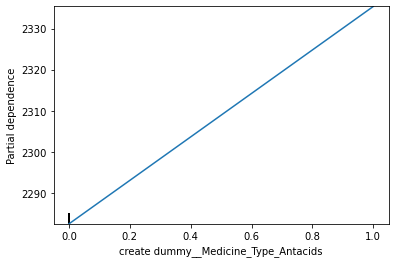

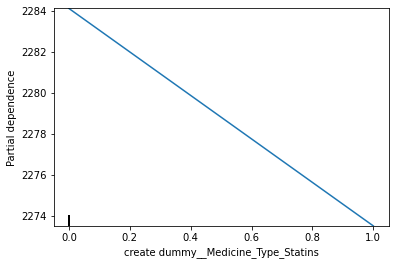

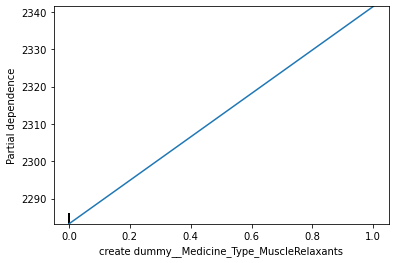

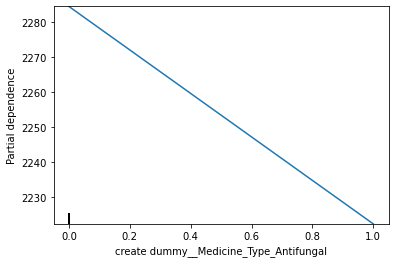

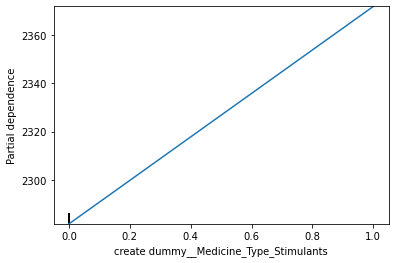

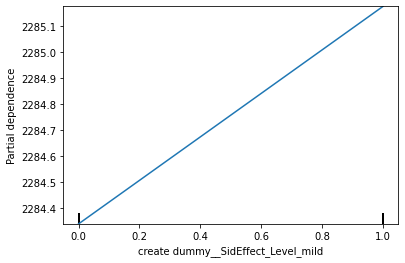

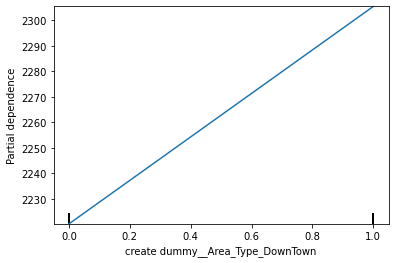

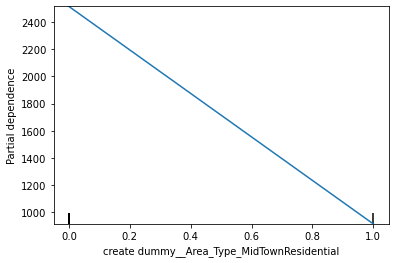

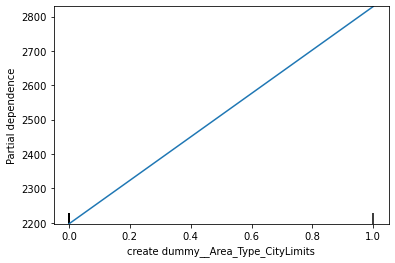

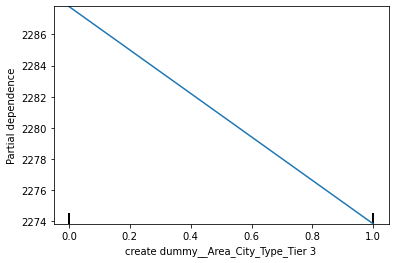

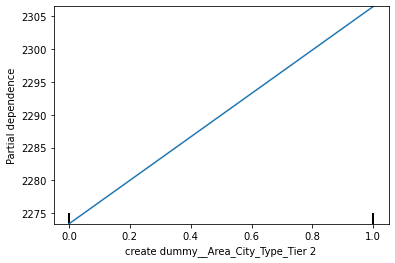

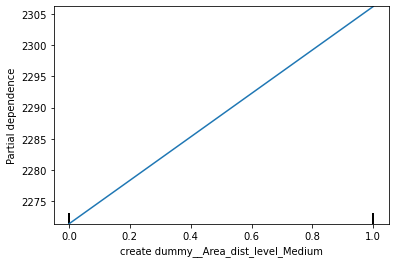

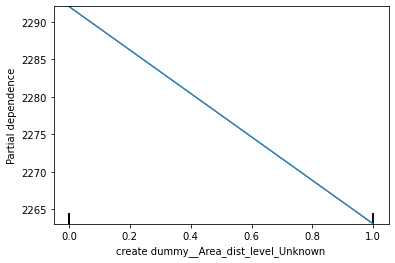

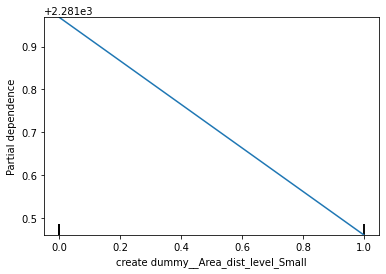

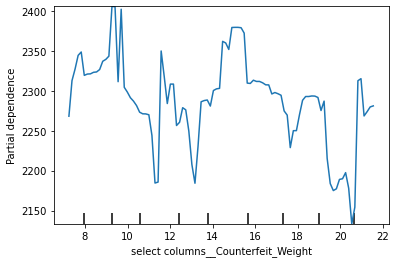

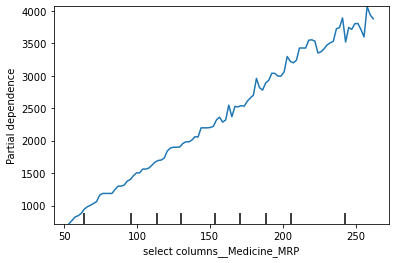

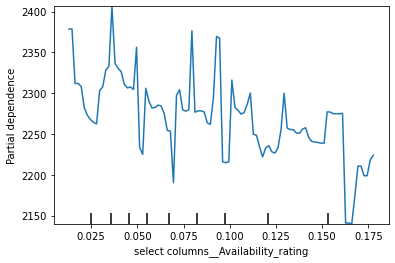

In [124]:
for col in list(X_train.columns):
    disp1 = plot_partial_dependence(cat_model, X_train, [col])
    plt.show()

In [159]:
# x_ld_train1 = x_ld_train[['select columns__Medicine_MRP','create dummy__Area_Type_MidTownResidential','create dummy__DistArea_ID_Area027','select columns__Counterfeit_Weight',
#                           'create dummy__Area_Type_CityLimits','select columns__Counterfeit_Weight','select columns__Availability_rating','create dummy__SidEffect_Level_mild',
#                          'create dummy__Medicine_Type_Hreplacements','create dummy__Medicine_Type_Antibiotics']]

In [160]:
# x_ld_test1 = x_ld_test[['select columns__Medicine_MRP','create dummy__Area_Type_MidTownResidential','create dummy__DistArea_ID_Area027','select columns__Counterfeit_Weight',
#                           'create dummy__Area_Type_CityLimits','select columns__Counterfeit_Weight','select columns__Availability_rating','create dummy__SidEffect_Level_mild',
#                          'create dummy__Medicine_Type_Hreplacements','create dummy__Medicine_Type_Antibiotics']]

In [161]:
# X_train,X_test,Y_train,Y_test = train_test_split(x_ld_train1, y_ld_train, test_size=0.2, random_state=1)

# Tree-based partitioning or Recursive partitioning

In [119]:
for leaf_index in np.unique(leaf_node_indices):
    subset_X = x_ld_train[leaf_node_indices == leaf_index]
    subset_y = y_ld_train[leaf_node_indices == leaf_index]
    X_train,X_test,Y_train,Y_test = train_test_split(subset_X, subset_y, test_size=0.2, random_state=1)
    Lm_1 = RandomForestRegressor()
    Lm_1.fit(X_train,Y_train) 
    Y_predict = Lm_1.predict(X_test)
    Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
    score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
    print(score,mean_absolute_error(Y_test,Y_predict))
    
    
    

NameError: name 'leaf_node_indices' is not defined

In [1053]:
class DecisionTreeSubSettingTraining(BaseEstimator,TransformerMixin):
    
    def fit(x_train,y_train):
        # Create decision tree regressor (you can adjust hyperparameters as needed)
        dt_regressor = DecisionTreeRegressor(max_depth= 4)#, random_state=42)
        dt_regressor.fit(x_train, y_train)
        
        # Extract the leaf node indices for each sample
        leaf_node_indices = dt_regressor.apply(x_train)
        for leaf_index in np.unique(leaf_node_indices):
            if(leaf_index == 19):
                 subset_X = x_train[leaf_node_indices == 19]
                 subset_y = y_train[leaf_node_indices == 19]
                 model1 = MLPRegressor(hidden_layer_sizes=(8,16,32,64,128,512,1024,4048,1024,512,128))
                 model1.fit(subset_X,subset_y)       
            else:
                subset_X = x_train[leaf_node_indices == leaf_index]
                subset_y = y_train[leaf_node_indices == leaf_index]
                model2 = LinearRegression()
                model2.fit(subset_X,subset_y)   
                
    def predict(x_test):
        leaf_node_indices_ = dt_regressor.apply(x_test)
        x_test_ = pd.concat([x_test,pd.DataFrame(leaf_node_indices_,columns=['index_sub_data'])],axis = 1)
        Y_predict = []
        for row in range(len(x_test_)):
            if(X_test_[row,44] == 19):  
                Y_predict.append(model1.predict(np.array(x_test.iloc[row]).reshape(1,44)))    
            else:
                Y_predict.append(model2.predict(np.array(x_test.iloc[row]).reshape(1,44)))
        Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
        return Y_predict

In [1054]:
aa = DecisionTreeSubSettingTraining.fit(X_train,Y_train)

In [1049]:
# def predict(x_test):
#     leaf_node_indices_ = dt_regressor.apply(x_test)
#     x_test_ = pd.concat([x_test,pd.DataFrame(leaf_node_indices_,columns=['index_sub_data'])],axis = 1)
#     Y_predict = []
#     for row in range(len(x_test)):
#         if(X_test_[row,44] == 19):  
#             Y_predict.append(model1.predict(np.array(x_test.iloc[row]).reshape(1,44)))    
#         else:
#             Y_predict.append(model2.predict(np.array(x_test.iloc[row]).reshape(1,44)))
#     Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
#     return Y_predict

In [1046]:
aa.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'predict'

In [1020]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5436068823578772

In [1021]:
r2_score(Y_test,Y_predict)

0.590233580431422

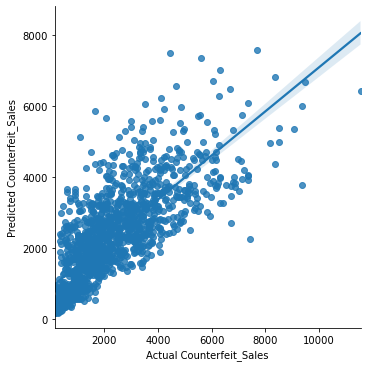

In [1022]:
sb.lmplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

# Linear Regression with TransformedTargetRegressor and Isotonic Regression  

In [263]:
Lm_1 = LinearRegression()
Lm_1.fit(X_train,Y_train) 

LinearRegression()

In [264]:
Y_predict = Lm_1.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [265]:
mean_absolute_error(Y_test,Y_predict)

799.7339360159511

In [266]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5182325686650897

In [267]:
mean_squared_error(Y_test,Y_predict)

1232239.3516360198

In [268]:
r2_score(Y_test,Y_predict)

0.5836283283180494

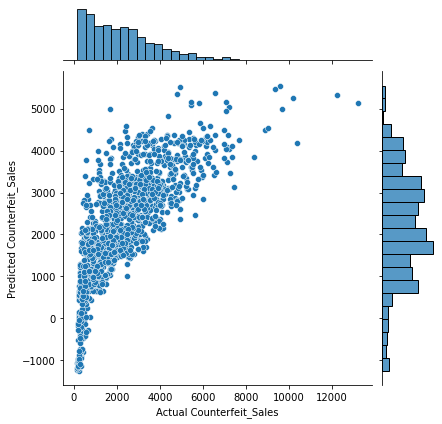

In [269]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [270]:
tt = TransformedTargetRegressor(regressor=LinearRegression(),
                         func=np.log, inverse_func=np.exp)
tt.fit(np.array(Y_predict).reshape(-1,1),np.array(Y_test)[:,0].reshape(-1,1))

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [271]:
Y_predict =  pd.DataFrame(data = tt.predict(Y_predict) , columns = ['Predicted Counterfeit_Sales'])

In [272]:
Y_predict.describe()

,Predicted Counterfeit_Sales
count,1364.000000
mean,2104.125584
std,1562.539382
min,226.614094
25%,1008.909829
50%,1605.921988
75%,2755.000759
max,11257.851399


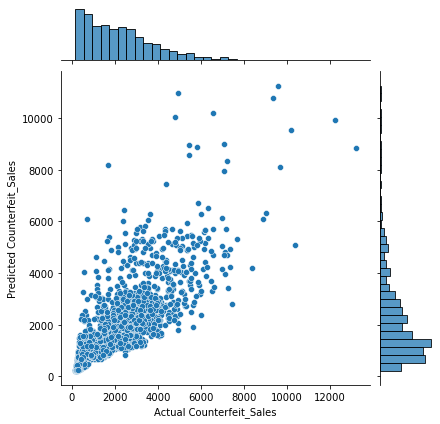

In [273]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [274]:
r2_score(Y_test,Y_predict)

0.567496535437205

In [275]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5247291735833378

In [276]:
ir = IsotonicRegression(out_of_bounds="clip")
ir.fit(np.array(Y_predict)[:,0],np.array(Y_test)[:,0])

IsotonicRegression(out_of_bounds='clip')

In [277]:
Y_ = ir.predict(Y_predict)
Y_predict =  pd.DataFrame(data = Y_ , columns = ['Predicted Counterfeit_Sales'])

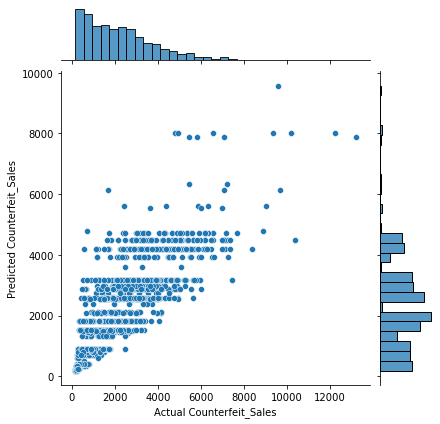

In [278]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [279]:
r2_score(Y_test,Y_predict)

0.6474118881011268

In [280]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5661852346272028

In [281]:
Y_predict = Lm_1.predict(x_ld_test)
Y_predict =  pd.DataFrame(data = tt.predict(Y_predict) , columns = ['Predicted Counterfeit_Sales'])

In [282]:
Y_predict.describe()

,Predicted Counterfeit_Sales
count,1705.000000
mean,2196.247497
std,1623.221534
min,222.410260
25%,1046.223292
50%,1728.134459
75%,2808.146365
max,11688.441497


In [283]:
Y_ = ir.predict(Y_predict)
Y_predict =  pd.DataFrame(data = Y_ , columns = ['Predicted Counterfeit_Sales'])

In [288]:
Y_predict

,Predicted Counterfeit_Sales
0,2561.434687
1,4191.199016
2,1333.974769
3,391.150754
4,341.688984
...,...
1700,3935.302317
1701,912.550426
1702,2862.300886
1703,4191.199016


In [297]:
transformed_data_sub = pd.DataFrame(data = Y_, columns= ['Counterfeit_Sales'])

In [298]:
temp = ld_test['Medicine_ID']

In [299]:
submissions = pd.concat([temp,transformed_data_sub],axis = 1)

In [300]:
submissions

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2561.434687
1,ECE94,4191.199016
2,SAD14,1333.974769
3,EQV63,391.150754
4,AIR10,341.688984
...,...,...
1700,KXW10,3935.302317
1701,CKE54,912.550426
1702,HAY13,2862.300886
1703,ZEE32,4191.199016


In [301]:
submissions.to_csv('sample_submission.csv',index=False)

In [302]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medicine_ID        1705 non-null   object 
 1   Counterfeit_Sales  1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


# Linear Regression follewed by curve fitting.

In [35]:
Lm_1 = LinearRegression()
Lm_1.fit(X_train,Y_train) 

LinearRegression()

In [36]:
Y_predict = Lm_1.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict , columns = ['Predicted Counterfeit_Sales'])
Y_predict.shape

(1364, 1)

In [38]:
# curve = pd.DataFrame(data = pd.concat([Y_test,Y_predict],axis = 1))
# curve.to_csv('curve.csv',index = False)
# curve

In [39]:
def model_func(x, a, b, c):
    return a*np.power(c, x) + b

In [40]:
popt, pcov = curve_fit(model_func,np.array(Y_predict)[:,0],np.array(Y_test)[:,0])

In [41]:
a_fit, b_fit, c_fit = popt

In [42]:
print("Optimized parameters (a, b, c):", a_fit, b_fit, c_fit)

Optimized parameters (a, b, c): 1793.4602784502058 -1408.0731734320975 1.0002956989035932


In [43]:
# Transform the data
transformed_data = np.array(1.793e+03* (2.71828)**(Y_predict*2.957e-04) + -1.408e+03 )
# # _
#transformed_data = np.log(yy - 5.822805670508793e-06) / np.log(1.000323950745208) - np.log(862.40217299746 ) / np.log(1.000323950745208)

print("Original data:", Y_test)
print("Transformed data:", transformed_data)


Original data:       Actual Counterfeit_Sales
0                    3683.6854
1                    3069.1520
2                     933.2656
3                    7141.1848
4                    2975.9400
...                        ...
1359                 1764.1840
1360                 2294.1608
1361                 7271.6816
1362                 2256.8760
1363                  534.4514

[1364 rows x 1 columns]
Transformed data: [[1934.62582046]
 [2080.50232828]
 [1985.13280285]
 ...
 [3597.30822166]
 [1635.81612855]
 [1930.74751246]]


In [44]:
transformed_data =  pd.DataFrame(data = transformed_data , columns = ['Predicted Counterfeit_Sales'])

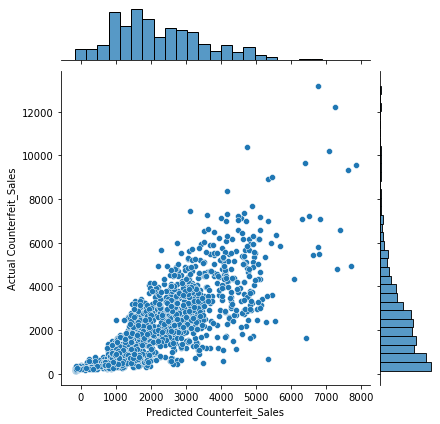

In [45]:
sb.jointplot(data = pd.concat([Y_test,transformed_data],axis  = 1 ), y = 'Actual Counterfeit_Sales' , x ='Predicted Counterfeit_Sales')

In [46]:
r2_score(Y_test,transformed_data)

0.6231387835527915

In [47]:
score = 1-(mean_absolute_error(Y_test,transformed_data)/1660)
score

0.5447024481905571

In [48]:
ir = IsotonicRegression(out_of_bounds="clip")
ir.fit(np.array(transformed_data)[:,0],np.array(Y_test)[:,0])

IsotonicRegression(out_of_bounds='clip')

In [49]:
Y_ = ir.predict(transformed_data)
Y_predict =  pd.DataFrame(data = Y_ , columns = ['Predicted Counterfeit_Sales'])

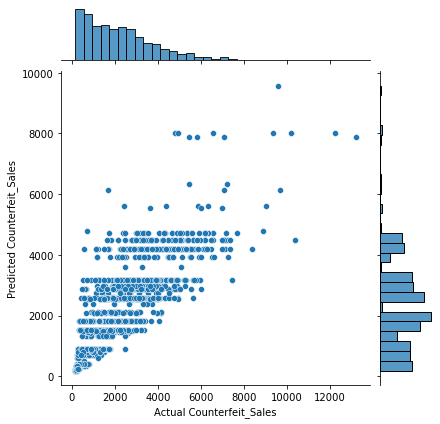

In [50]:
sb.jointplot(data = pd.concat([Y_test,Y_predict],axis  = 1 ), x = 'Actual Counterfeit_Sales' , y ='Predicted Counterfeit_Sales')

In [51]:
r2_score(Y_test,Y_predict)

0.6474118881011268

In [52]:
score = 1-(mean_absolute_error(Y_test,Y_predict)/1660)
score

0.5661852346272028

# Submissions

In [320]:
Y_predict = Lm_1.predict(x_ld_test)

In [321]:
transformed_data_sub = np.array(a_fit* (c_fit)**Y_predict + b_fit )

In [326]:
transformed_data_sub = pd.DataFrame(data = transformed_data_sub, columns= ['Counterfeit_Sales'])

In [327]:
temp = ld_test['Medicine_ID']

In [329]:
submissions = pd.concat([temp,transformed_data_sub],axis = 1)

In [330]:
submissions

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2573.573195
1,ECE94,4096.749774
2,SAD14,1300.805907
3,EQV63,420.087432
4,AIR10,256.024275
...,...,...
1700,KXW10,3520.515120
1701,CKE54,999.801620
1702,HAY13,2741.030378
1703,ZEE32,4036.328333


In [331]:
submissions.to_csv('sample_submission.csv',index=False)

In [333]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medicine_ID        1705 non-null   object 
 1   Counterfeit_Sales  1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [330]:
submissions

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2573.573195
1,ECE94,4096.749774
2,SAD14,1300.805907
3,EQV63,420.087432
4,AIR10,256.024275
...,...,...
1700,KXW10,3520.515120
1701,CKE54,999.801620
1702,HAY13,2741.030378
1703,ZEE32,4036.328333


In [331]:
submissions.to_csv('sample_submission.csv',index=False)

In [333]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medicine_ID        1705 non-null   object 
 1   Counterfeit_Sales  1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB
